# [Question 68](https://projecteuler.net/problem=68)

## Magic 5-gon Ring
Consider the following "magic" 3-gon ring, filled with the numbers 1 to 6, and each line adding to nine.<br>

<div style="background-color: white; display: inline-block; padding: 10px; text-align: center;">
    <img src="https://projecteuler.net/resources/images/0068_1.png?1678992052" alt="Image" />
</div>

Working clockwise, and starting from the group of three with the numerically lowest external node (4,3,2 in this example), each solution can be described uniquely. For example, the above solution can be described by the set: 4,3,2; 6,2,1; 5,1,3.<br>
It is possible to complete the ring with four different totals: 9, 10, 11, and 12. There are eight solutions in total.<br>

| Total | Solution Set        |
|-------|---------------------|
|     9 | 4,2,3; 5,3,1; 6,1,2 |
|     9 | 4,3,2; 6,2,1; 5,1,3 |
|    10 | 2,3,5; 4,5,1; 6,1,3 |
|    10 | 2,5,3; 6,3,1; 4,1,5 |
|    11 | 1,4,6; 3,6,2; 5,2,4 |
|    11 | 1,6,4; 5,4,2; 3,2,6 |
|    12 | 1,5,6; 2,6,4; 3,4,5 |
|    12 | 1,6,5; 3,5,4; 2,4,6 |

By concatenating each group it is possible to form 9-digit strings; the maximum string for a 3-gon ring is 432621513.<br>
Using the numbers 1 to 10, and depending on arrangements, it is possible to form 16- and 17-digit strings. What is the maximum 16-digit string for a "magic" 5-gon ring?<br>

<div style="background-color: white; display: inline-block; padding: 10px; text-align: center;">
    <img src="https://projecteuler.net/resources/images/0068_2.png?1678992052" alt="Image" />
</div>

# Solution

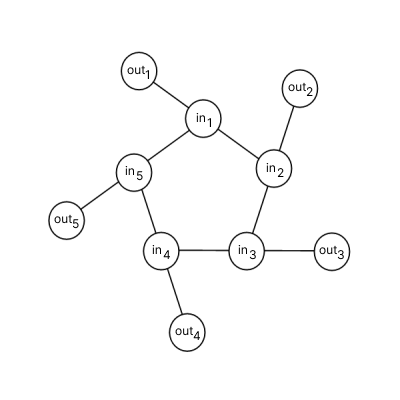

In [189]:
from itertools import combinations, permutations

In [190]:
def form_number(outer, inner):
    set_size = len(outer)
    num_string = ''
    for i in range(set_size):
        num_string += str(outer[i]) + str(inner[i]) + str(inner[(i+1) % set_size])
    return int(num_string)

In [191]:
def are_valid_sets(outer, inner):
    """This function check if each line of the ring have the same sum"""
    set_size = len(outer)
    target_sum = outer[0] + inner[0] + inner[1]

    for i in range(1,set_size):
        if outer[i] + inner[i] + inner[(i+1) % set_size] != target_sum:
            return False
    return True

In [192]:
def valid_ring(size):
    num_limit = size*2
    for outer_nums in permutations(range(1,num_limit+1), r=size): 
        if outer_nums[0] == min(outer_nums):                # First number must be the lowest
            for inner_nums in permutations(set(range(1, num_limit+1)) - set(outer_nums)):
                if are_valid_sets(outer_nums, inner_nums):
                    yield form_number(outer_nums, inner_nums)

In [193]:
def solution():
    ring_numbers = valid_ring(size=5)
    return max(num for num in ring_numbers if len(str(num))==16)

# Run

In [194]:
%%time
solution()

CPU times: total: 93.8 ms
Wall time: 266 ms


6531031914842725

valid_ring function works for other sizes as well

In [195]:
%%time
print(max(valid_ring(size=3)))

432621513
CPU times: total: 0 ns
Wall time: 1 ms


## Faster approach

Because we are looking for 16-digit 5-gon number, and the number inside the ring repeat 2 times <br>
=> 10 must be on the outside 

In [196]:
def valid_ring(size):
    num_limit = size*2
    for outer in combinations(range(1,num_limit), r=size-1):    # Pick combination of outside numbers (without 10)
        for outer_nums in permutations((*outer, num_limit)):    # Add 10 then create permutations
            if outer_nums[0] == min(outer_nums):                # First number must be the lowest
                for inner_nums in permutations(set(range(1, num_limit+1)) - set(outer_nums)):
                    if are_valid_sets(outer_nums, inner_nums):
                        yield form_number(outer_nums, inner_nums)

In [197]:
def solution():
    return max(valid_ring(size=5)) # We sure that the size is 16 so no need to check condition

In [198]:
%%time
solution()

CPU times: total: 78.1 ms
Wall time: 125 ms


6531031914842725